<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-100/blob/main/Crime_Analysis_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crime Analysis

In [3]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 7.6 MB/s 
     |████████████████████████████████| 15.4 MB 40.5 MB/s 
     |████████████████████████████████| 6.3 MB 31.3 MB/s 


In [1]:
import numpy as np
import pandas as pd 

In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode , plot,iplot
import plotly.express as px
import plotly.graph_objects as go


from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [ ]:
victims = pd.read_csv('../input/crime-in-india/20_Victims_of_rape.csv')
police_hr = pd.read_csv('../input/crime-in-india/35_Human_rights_violation_by_police.csv')
auto_theft = pd.read_csv('../input/crime-in-india/30_Auto_theft.csv')
prop_theft = pd.read_csv('../input/crime-in-india/10_Property_stolen_and_recovered.csv')

In [ ]:
victims

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0
1046,West Bengal,2009,Victims of Other Rape,2333,0,18,84,1834,391,2333,6
1047,West Bengal,2010,Total Rape Victims,2311,0,22,51,1779,459,2311,0
1048,West Bengal,2010,Victims of Incest Rape,4,0,1,0,2,1,4,0


In [ ]:
rape_victims= victims[victims['Subgroup']=='Victims of Incest Rape']

In [ ]:
rape_victims

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
7,Andaman & Nicobar Islands,2003,Victims of Incest Rape,0,0,0,0,0,0,0,0
10,Andaman & Nicobar Islands,2004,Victims of Incest Rape,0,0,0,0,0,0,0,0
13,Andaman & Nicobar Islands,2005,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1036,West Bengal,2006,Victims of Incest Rape,6,0,0,0,6,0,6,0
1039,West Bengal,2007,Victims of Incest Rape,114,0,2,3,81,25,114,3
1042,West Bengal,2008,Victims of Incest Rape,9,0,2,1,1,0,9,5
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0


In [ ]:
g= pd.DataFrame(rape_victims.groupby(['Year'])['Rape_Cases_Reported'].sum().reset_index())

In [ ]:
g

,Year,Rape_Cases_Reported
0,2001,439
1,2002,369
2,2003,399
3,2004,505
4,2005,750
5,2006,431
6,2007,405
7,2008,309
8,2009,321
9,2010,288


In [ ]:
g.columns=['Year','Cases Reported']

In [ ]:
g.columns

Index(['Year', 'Cases Reported'], dtype='object')

In [ ]:
g

,Year,Cases Reported
0,2001,439
1,2002,369
2,2003,399
3,2004,505
4,2005,750
5,2006,431
6,2007,405
7,2008,309
8,2009,321
9,2010,288


In [ ]:
g1= pd.DataFrame(rape_victims.groupby(['Area_Name'])['Rape_Cases_Reported'].sum().reset_index())

In [ ]:
g1

,Area_Name,Rape_Cases_Reported
0,Andaman & Nicobar Islands,1
1,Andhra Pradesh,70
2,Arunachal Pradesh,0
3,Assam,101
4,Bihar,43
5,Chandigarh,17
6,Chhattisgarh,532
7,Dadra & Nagar Haveli,0
8,Daman & Diu,0
9,Delhi,231


In [ ]:
g1.columns=['State/UT','Cases Reported']

In [ ]:
g1.columns

Index(['State/UT', 'Cases Reported'], dtype='object')

In [ ]:
g1.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

In [ ]:
g1

,State/UT,Cases Reported
0,Andaman & Nicobar Islands,1
1,Andhra Pradesh,70
2,Arunanchal Pradesh,0
3,Assam,101
4,Bihar,43
5,Chandigarh,17
6,Chhattisgarh,532
7,Dadra & Nagar Haveli,0
8,Daman & Diu,0
9,Delhi,231


In [ ]:
shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')

In [ ]:
shp_gdf

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [ ]:
merge =shp_gdf.set_index('st_nm').join(g1.set_index('State/UT'))

In [ ]:
merge

,geometry,Cases Reported
st_nm,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",0.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",101.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",43.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",17.0
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",532.0
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",NaN
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",0.0
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",7.0


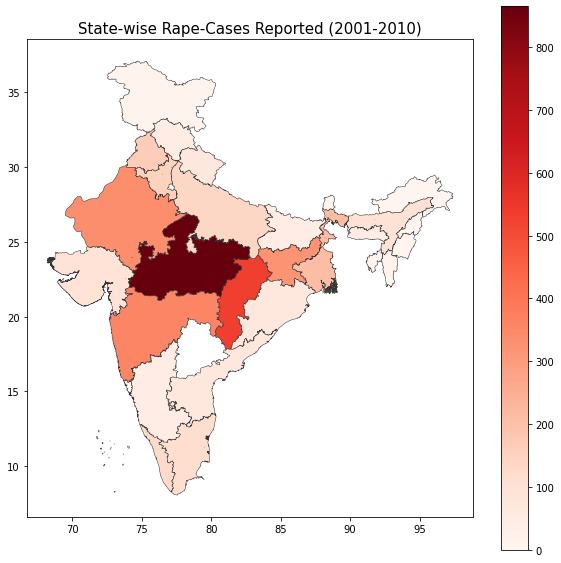

In [ ]:
fig,ax=plt.subplots(1, figsize=(10,10))

ax.set_title('State-wise Rape-Cases Reported (2001-2010)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merge.plot(column='Cases Reported', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

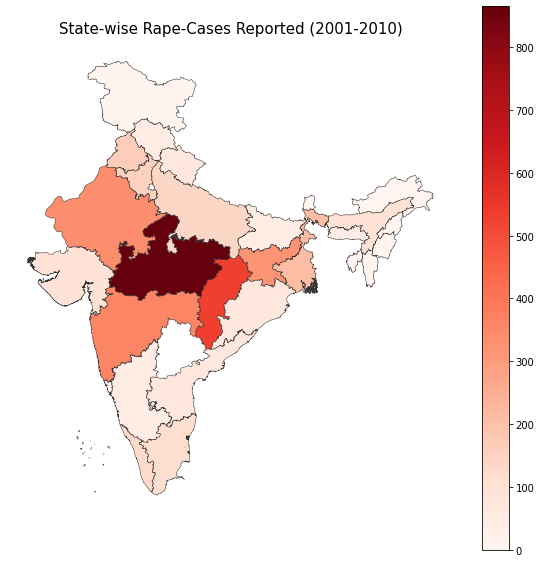

In [ ]:
fig,ax=plt.subplots(1, figsize=(10,10))
ax.axis('off')
ax.set_title('State-wise Rape-Cases Reported (2001-2010)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merge.plot(column='Cases Reported', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [ ]:
above_50 = rape_victims['Victims_Above_50_Yrs'].sum()
ten_to_14 = rape_victims['Victims_Between_10-14_Yrs'].sum()
fourteen_to_18 = rape_victims['Victims_Between_14-18_Yrs'].sum()
eighteen_to_30 = rape_victims['Victims_Between_18-30_Yrs'].sum()
thirty_to_50 = rape_victims['Victims_Between_30-50_Yrs'].sum()
upto_10 = rape_victims['Victims_Upto_10_Yrs'].sum()


In [ ]:
g2= pd.DataFrame(police_hr.groupby(['Area_Name'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())


In [ ]:
g2.columns= ['State/UT','Cases Reported']

In [ ]:
g2

,State/UT,Cases Reported
0,Andhra Pradesh,226.0
1,Arunachal Pradesh,40.0
2,Assam,302.0
3,Bihar,52.0
4,Chandigarh,2.0
5,Chhattisgarh,624.0
6,Daman & Diu,0.0
7,Delhi,24.0
8,Goa,6.0
9,Gujarat,226.0


In [ ]:
g2.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g2.set_index('State/UT'))

In [ ]:
shp_gdf

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


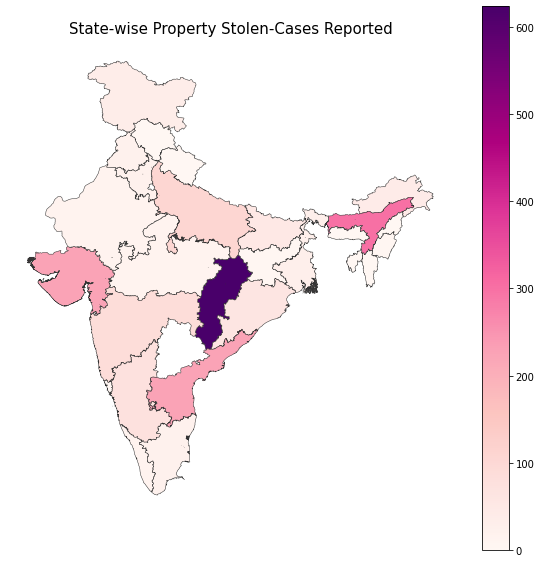

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Property Stolen-Cases Reported',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='RdPu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [ ]:
police_hr.Group_Name.value_counts()

HR_Total Violations by Police                 214
HR_Others Violations by Police                194
HR_Torture                                    190
HR_Disappearance of Persons                   190
HR_Extortion                                  190
HR_Atrocities on SC/ST                        188
HR_Illegal detention/arrests                  186
HR_Fake encounter killings                    185
HR_Indignity to Women                         185
HR_False implication                          182
HR_Violation against Terrorists/Extremists    182
HR_Failure in taking action                   181
Name: Group_Name, dtype: int64

In [ ]:
fake_enc_df = police_hr[police_hr['Group_Name']=='HR_Fake encounter killings'] 
fake_enc_df.Cases_Registered_under_Human_Rights_Violations.sum()

16.0

In [ ]:
false_imp_df = police_hr[police_hr['Group_Name']=='HR_False implication'] 
false_imp_df.Cases_Registered_under_Human_Rights_Violations.sum()

29.0

In [ ]:
g4 = pd.DataFrame(police_hr.groupby(['Year'])['Policemen_Chargesheeted','Policemen_Convicted'].sum().reset_index())

In [ ]:
g4

,Year,Policemen_Chargesheeted,Policemen_Convicted
0,2001,270.0,4.0
1,2002,118.0,0.0
2,2003,46.0,20.0
3,2004,44.0,0.0
4,2005,42.0,0.0
5,2006,56.0,0.0
6,2007,74.0,0.0
7,2008,28.0,16.0
8,2009,166.0,116.0
9,2010,28.0,8.0


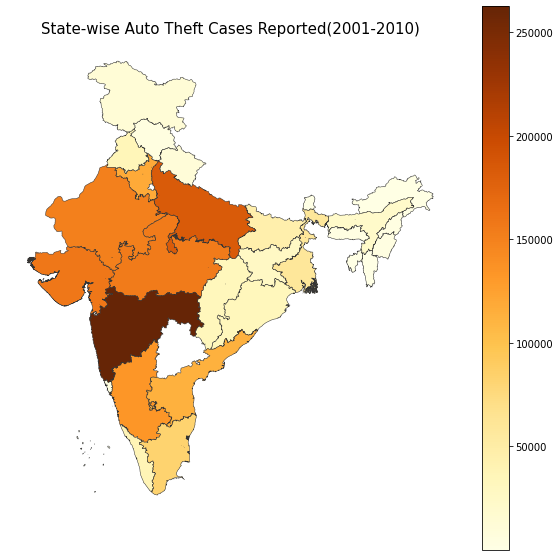

In [ ]:
g5 = pd.DataFrame(auto_theft.groupby(['Area_Name'])['Auto_Theft_Stolen'].sum().reset_index())
g5.columns = ['State/UT','Vehicle_Stolen']
g5.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g5.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Auto Theft Cases Reported(2001-2010)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Vehicle_Stolen', cmap='YlOrBr', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

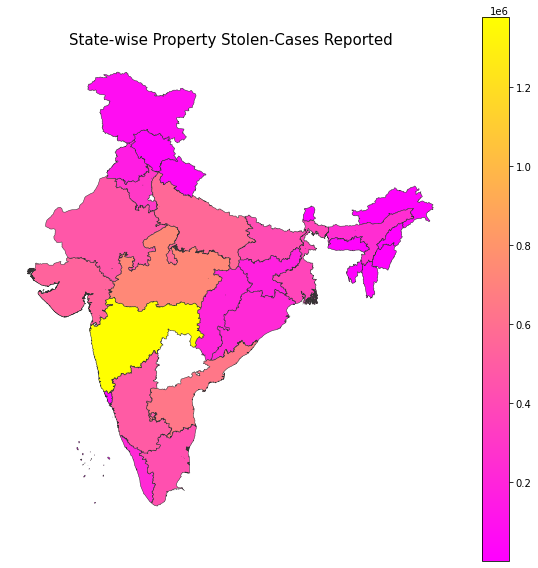

In [ ]:
g7 = pd.DataFrame(prop_theft.groupby(['Area_Name'])['Cases_Property_Stolen'].sum().reset_index())
g7.columns = ['State/UT','Cases Reported']
g7.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g7.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Property Stolen-Cases Reported',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='spring', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
